# Introduction

> **Will it rain tomorrow?**

That is the question we will try to answer in this project, practicing machine learning.

## Context

A vacation of a group of friends is about to start and they will arrive at the Melbourne Airport tomorrow. They rented a place near the airport and they want to go on foot to the rented place to save money in the beginning of their trip. But, if it is raining, they will have to go there using a mean of transportation, since they do not want to get wet. So, they want to know if it is going to rain tomorrow around the Melbourne Airport to know if they need to schedule a shuttle bus to take them to the rented place.

---

### Project Objective

> **Find if it will tomorrow around the Melbourne Airport.**

---

## Process

This project will be divided into 3 parts:

1. Initial Analysis of the Variables
2. Baseline
3. **Development of the Machine Learning Model**


# Part 03 | Development of the Machine Learning Model

## Setup

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Import the Dataset

In [2]:
# Import the dataset
df = pd.read_csv('exported_df/complete_dataset.csv')

#### Create a Backup for the Raw Dataframe

In [3]:
df_bkp = df.copy()

### Final Raw Dataset - Melbourne Airpot

In [4]:
# Filter the dataset
df_ma = df.query('location == "MelbourneAirport"').reset_index(drop=True)

# Check the dataset
df_ma

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,wind_gustdir_complete,wind_gustspeed_complete,raintoday_int,raintomorrow_int
0,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,55.0,37.0,1005.1,...,NaN,NaN,NaN,NaN,NaN,NaN,SW,69.0,0,1
1,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,50.0,43.0,1018.0,...,NaN,NaN,NaN,NaN,NaN,NaN,SSE,56.0,1,0
2,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,51.0,35.0,1020.8,...,NaN,NaN,NaN,NaN,NaN,NaN,SSE,31.0,0,0
3,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,67.0,23.0,1016.2,...,NaN,NaN,NaN,NaN,NaN,NaN,SSE,35.0,0,0
4,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,51.0,31.0,1011.9,...,NaN,NaN,NaN,NaN,NaN,NaN,SE,33.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,2017-06-21,MelbourneAirport,7.7,13.2,0.2,0.6,0.0,97.0,78.0,1029.1,...,N,37.0,W,S,9.0,13.0,N,37.0,0,0
3005,2017-06-22,MelbourneAirport,2.4,13.0,0.0,0.6,0.0,78.0,60.0,1028.6,...,N,39.0,N,N,17.0,19.0,N,39.0,0,0
3006,2017-06-23,MelbourneAirport,5.5,13.2,0.0,1.6,6.0,68.0,66.0,1018.7,...,N,57.0,NNW,N,19.0,35.0,N,57.0,0,1
3007,2017-06-24,MelbourneAirport,5.7,12.6,1.2,1.8,5.6,80.0,50.0,1018.9,...,SW,33.0,W,W,17.0,7.0,SW,33.0,1,0


In [50]:
df_ma.isna().sum().sort_values(ascending=False)

wind_dir9am                2187
wind_gustdir               2181
wind_gustspeed             2181
wind_dir3pm                2179
wind_speed9am              2177
wind_speed3pm              2176
winddir9am                  862
winddir3pm                  843
windgustspeed               843
windgustdir                 843
windspeed3pm                833
windspeed9am                833
wind_gustspeed_complete      15
wind_gustdir_complete        15
humidity3pm                   9
humidity                      9
humidity9am                   8
evaporation                   3
sunshine                      1
cloud3pm                      1
location                      0
mintemp                       0
maxtemp                       0
rainfall                      0
cloud9am                      0
pressure9am                   0
pressure3pm                   0
raintomorrow_int              0
temp9am                       0
temp3pm                       0
raintoday                     0
amountOf

#### Create a Backup Dataframe

In [5]:
df_ma_bkp = df_ma.copy()

Some observations from the Part 02:

- `mintemp` (°C)
  - Minimum: -1.000000	
  - Maximum: 30.50 - Too high
- `maxtemp` (°C)
  - Minimum: 8.400000		
  - Maximum: 46.80 - Too High
- `temp` (°C)
  - Minimum: 2.002276		
  - Maximum: 58.16 - Too High
- `rainfall` (mm)
  - Mean: 1.441999
  - Maximum: 75.80
- `humidity` (%)
  - Minimum value: 2.001612	
  - Maximum value: 119.60 - Value higher than 100%
- `evaporation` (mm)
- `sunshine` (hours)
- `wind_gustspeed_complete` (km/h)
- `raintoday_int`
  - Mean: 0.217712
  - Standard Deviation: 0.412760
- `raintomorrow_int`
  - Mean: 0.216035
  - Standard Deviation: 0.411607

## Pipeline

In [14]:
# Pipeline
modeling = Pipeline(steps=[('scaler', StandardScaler()),
                           ('logistic', LogisticRegression())],
                    verbose=True)

## Analysis 01

For this first analysis, we will use only the features that influenced the most in the baseline model.

- humidity
- sunshine
- wind speed
- maximum temperature
- evaporation

### Exploratory Data Analysis (EAD)

In [8]:
# Filter the dataset
columns = ['raintoday', 'raintomorrow', 'mintemp', 'maxtemp', 'temp', 'rainfall', 'humidity', 'evaporation', 
           'sunshine', 'wind_gustspeed_complete']

df_ma_f = df_ma[columns]
df_ma_f

,raintoday,raintomorrow,mintemp,maxtemp,temp,rainfall,humidity,evaporation,sunshine,wind_gustspeed_complete
0,No,Yes,11.2,19.9,25.880000,0.0,46.4,5.6,8.8,69.0
1,Yes,No,7.8,17.8,23.360000,1.2,53.6,7.2,12.9,56.0
2,No,No,6.3,21.1,2.705801,0.0,44.0,6.2,10.5,31.0
3,No,No,8.1,29.2,37.040000,0.0,29.6,6.4,12.5,35.0
4,No,No,9.7,29.0,36.800000,0.0,39.2,7.4,12.3,33.0
...,...,...,...,...,...,...,...,...,...,...
3004,No,No,7.7,13.2,17.840000,0.2,95.6,0.6,0.0,37.0
3005,No,No,2.4,13.0,17.600000,0.0,74.0,0.6,0.0,39.0
3006,No,Yes,5.5,13.2,17.840000,0.0,81.2,1.6,6.0,57.0
3007,Yes,No,5.7,12.6,17.120000,1.2,62.0,1.8,5.6,33.0


In [9]:
# Check missing values
df_ma.isna().sum().sort_values(ascending=False)

wind_dir9am                2187
wind_gustdir               2181
wind_gustspeed             2181
wind_dir3pm                2179
wind_speed9am              2177
wind_speed3pm              2176
winddir9am                  862
winddir3pm                  843
windgustspeed               843
windgustdir                 843
windspeed3pm                833
windspeed9am                833
wind_gustspeed_complete      15
wind_gustdir_complete        15
humidity3pm                   9
humidity                      9
humidity9am                   8
evaporation                   3
sunshine                      1
cloud3pm                      1
location                      0
mintemp                       0
maxtemp                       0
rainfall                      0
cloud9am                      0
pressure9am                   0
pressure3pm                   0
raintomorrow_int              0
temp9am                       0
temp3pm                       0
raintoday                     0
amountOf

In [19]:
((15+9+3+1) / 3009) * 100

0.9305417082087072

In [26]:
3009 - (15+9+3+1)

2981

Menos 1% dados faltando das variáveis citadas acima, então iremos remover estas linhas

In [10]:
# Filter the dataset to remove missing values in the desired columns
df_f = df_ma[~(df_ma['wind_gustspeed_complete'].isna()) & ~(df_ma['humidity'].isna()) & ~(df_ma['sunshine'].isna()) & ~(df_ma['evaporation'].isna())]

# Check the resukt
df_f.shape

(2981, 39)

In [11]:
# Desired Columns
columns = ['raintoday_int', 'raintomorrow_int', 'maxtemp', 'humidity', 'evaporation', 'sunshine', 'wind_gustspeed_complete']

# Filter the dataset
df_f = df_f[columns]

# Check the result
df_f

,raintoday_int,raintomorrow_int,maxtemp,humidity,evaporation,sunshine,wind_gustspeed_complete
0,0,1,19.9,46.4,5.6,8.8,69.0
1,1,0,17.8,53.6,7.2,12.9,56.0
2,0,0,21.1,44.0,6.2,10.5,31.0
3,0,0,29.2,29.6,6.4,12.5,35.0
4,0,0,29.0,39.2,7.4,12.3,33.0
...,...,...,...,...,...,...,...
3004,0,0,13.2,95.6,0.6,0.0,37.0
3005,0,0,13.0,74.0,0.6,0.0,39.0
3006,0,1,13.2,81.2,1.6,6.0,57.0
3007,1,0,12.6,62.0,1.8,5.6,33.0


### Pipeline

In [ ]:
# Pipeline
modeling = Pipeline(steps=[('scaler', StandardScaler()),
                           ('logistic', LogisticRegression())],
                    verbose=True)

### Setup for the Model

In [29]:
# Create Variables
columns = ['maxtemp', 'humidity', 'evaporation', 'sunshine', 'wind_gustspeed_complete']

X = df_f[columns]
y = df_f['raintomorrow_int']

In [30]:
# Holdout
# Split the dataset into trainnig and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

### Modeling

In [31]:
# Train thr model
modeling.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing logistic, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())],
         verbose=True)

#### Result

In [32]:
# Check the coefficients
pd.DataFrame(zip(X_train.columns, modeling['logistic'].coef_.tolist()[0]), 
             columns=['feature', 'coefficient']).sort_values(by='coefficient', ascending=False).reset_index(drop=True)

,feature,coefficient
0,humidity,0.846398
1,wind_gustspeed_complete,0.745667
2,maxtemp,0.457151
3,evaporation,-0.092210
4,sunshine,-0.724979


In [33]:
# Check the intercept
modeling['logistic'].intercept_

array([-1.73546661])

In [35]:
# Number maximum of iterations
modeling['logistic'].n_iter_

array([13])

#### Metrics

In [42]:
# Create a dataframe for the metrics
df_metrics = pd.DataFrame(columns=['model', 'accuracy_train', 'accuracy_test',
                                   'precision_train', 'precision_test', 
                                   'recall_train', 'recall_test', 
                                   'auc_train', 'auc_teste'])

# Add row
row_values = {'model': 'baseline',
              
              'accuracy_train': modeling.score(X=X_train, y=y_train),
              'accuracy_test': modeling.score(X=X_test, y=y_test),
              
              'precision_train': precision_score(y_true=y_train, y_pred=modeling.predict_proba(X_train)[:, 1] > 0.2),
              'precision_test': precision_score(y_true=y_test, y_pred=modeling.predict_proba(X_test)[:, 1] > 0.2),
              
              'recall_train': recall_score(y_true=y_train, y_pred=modeling.predict_proba(X_train)[:, 1] > 0.2),
              'recall_test': recall_score(y_true=y_test, y_pred=modeling.predict_proba(X_test)[:, 1] > 0.2),
              
              'auc_train': roc_auc_score(y_true=y_train, y_score=modeling.predict_proba(X_train)[:, 1]),
              'auc_teste': roc_auc_score(y_true=y_test, y_score=modeling.predict_proba(X_test)[:, 1])}

df_metrics = df_metrics.append(row_values, ignore_index=True)

# Check the result
df_metrics

,model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,auc_train,auc_teste
0,baseline,0.834732,0.824121,0.429796,0.441964,0.778641,0.767442,0.816052,0.823412


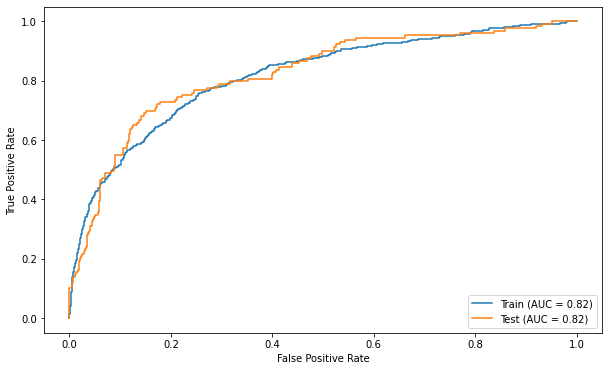

In [46]:
fig, ax = plt.subplots(figsize=(10,6))

plot_roc_curve(estimator=modeling, X=X_train, y=y_train, ax=ax, name='Train')
plot_roc_curve(estimator=modeling, X=X_test, y=y_test, ax=ax, name='Test');